<center> <b>
        <span style="font-size:24px;">FINA 4335 -Final Project-<span style="color:red;">Part I <span></span></b>
<center><span style="font-size:22px;"><b>Due date: 12/11/2024 11:59 PM ET</b></span></center>  

##### First name and Last name (team member 1): Benjamin Damon
##### First name and Last name (team member 2): Stephen Magliocchino
##### First name and Last name (team member 3): Benjamin Inglesby

## Instructions

1. Please rename the notebook. It should have the following format: **Final Project_Part I_Lastname1_Lastname2** if there are 2 members in the team.
1. Use this **template** and you are free to modify or add more code/markdown cells. 
1. After you answer all questions:
    1. Restart your kernel and run all cells
    1. Save your notebook and export your notebook as HTML
    1. Submit the **notebook** and **HTML** to Canvas, under Final Group Project.

## Some Grading Guidelines
1. All code cells (excluding evaluation cells) should be **executable**. 
    - Non-executable code cells will receive up to **50%** of grade deduction. To receive more partial credit for a non-executable code cell, ensure it includes sufficient comments.
1.  <span style="color: blue;">I grade on both **'correctness'** and **effort**</span>
    - **Suppose you don’t know how to generate a specific variable, then you <span style="color: red;">may use random values (with reasonable range) to replace the variable</span>. You will lose point for that variable but will get most credit for subsequent questions.**
1. Write efficient and clean code
    -  No repetitive code (An example of repetitive code: import the same csv file twice).
    - Informative variable names (if not specified in the project description).
    - Less than 2 uncommented `print`, `.describe()`, or similar quality check in every code cell or every 5 lines of code.
    - Every 2 occurrence of inefficient or unclean code will receive **1 point deduction**
1. Include sufficient comments (at least 1 comment every 3 lines of code)
      - Failure to include sufficient comments will result in a **5 points** grade deduction
1. Format the markdown file such as including headings and brief question description
1. Use the methods and formulas **covered in the lecture notebooks**; Using formulas inconsistent to the lecture notebooks receives 20% of grade penalty
1. Reasonable code execution time
   - The code execution time for Part I should be less than 5 minutes, otherwise **deduct 1 point for every 5 minutes more code execuation time**
1. **10% of grade penalty per day late, receive 0% if the project is submitted after Dec 13 11:59 PM ET.**

In [564]:
# import some packages
# you may need to import more packages
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import datetime
import warnings
import time
# Suppress some annoying warnings 
warnings.filterwarnings("ignore", message=".*date_parser.*")
# Measure execution time
start_time = time.time()  # Start time

## 1. Obtain asset returns

### Download Fama-French 5 industry portfolios (2 points)

In [565]:
# code provided; if you don't like my code you can change them
start_date = '1995-01-01'; end_date = '2024-11-30'
ff5ind_monthlyret = pdr.DataReader('5_Industry_Portfolios', 'famafrench', 
                                 start_date, end_date)[0]
# Convert percentage returns to decimals 
ff5ind_monthlyret = ff5ind_monthlyret / 100

In [566]:
# Evaluation cell (for grading)
print("\nFirst 3 rows of monthly returns (`ff5ind_monthlyret`):")
print(ff5ind_monthlyret.head(3))
print("\nLast 3 rows of monthly returns (`ff5ind_monthlyret`):")
print(ff5ind_monthlyret.tail(3))


First 3 rows of monthly returns (`ff5ind_monthlyret`):
          Cnsmr   Manuf   HiTec   Hlth    Other
Date                                           
1995-01  0.0062  0.0106  0.0125  0.0618  0.0471
1995-02  0.0314  0.0437  0.0452  0.0226  0.0485
1995-03  0.0293  0.0285  0.0277  0.0280  0.0190

Last 3 rows of monthly returns (`ff5ind_monthlyret`):
          Cnsmr   Manuf   HiTec   Hlth    Other
Date                                           
2024-08  0.0105  0.0118  0.0134  0.0644  0.0303
2024-09  0.0441  0.0194  0.0309 -0.0181  0.0066
2024-10 -0.0169 -0.0200 -0.0009 -0.0311  0.0111


### Create three additional portfolios (15 points)

In [567]:
# Write your code in the provided code cell; you can add more cells (same applies below, no further repetition).
#Set weights for the portfolios
weights_tech_reb = np.array([0.15, 0.15, 0.40, 0.15, 0.15])
weights_consumer_reb = np.array([0.40, 0.15, 0.15, 0.15, 0.15])
weights_ew_reb = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

#apply weights to rebalanced portfolios
Extra_3assets = pd.DataFrame({
    'tech_heavy_reb': np.dot(ff5ind_monthlyret, weights_tech_reb),
    'consumer_heavy_reb': np.dot(ff5ind_monthlyret, weights_consumer_reb),
    'ew_reb': np.dot(ff5ind_monthlyret, weights_ew_reb)
}, index=ff5ind_monthlyret.index)

#Testing
print("\nFirst 3 rows of portfolio returns (`Extra_3assets`):")
print(Extra_3assets.head(3))
print(Extra_3assets.columns)


First 3 rows of portfolio returns (`Extra_3assets`):
         tech_heavy_reb  consumer_heavy_reb   ew_reb
Date                                                
1995-01        0.023855             0.02228  0.02764
1995-02        0.040010             0.03656  0.03828
1995-03        0.026800             0.02720  0.02650
Index(['tech_heavy_reb', 'consumer_heavy_reb', 'ew_reb'], dtype='object')


In [568]:
# Evaluation cell (for grading)
Extra_3assets.head()

,tech_heavy_reb,consumer_heavy_reb,ew_reb
Date,,,
1995-01,0.023855,0.02228,0.02764
1995-02,0.040010,0.03656,0.03828
1995-03,0.026800,0.02720,0.02650
1995-04,0.034030,0.02088,0.02674
1995-05,0.029805,0.03403,0.03234


#### Merge self-created portfolio returns with industry portfolio returns

In [569]:
#Merge dataframes
assets_monthly = ff5ind_monthlyret.join(Extra_3assets)
print(assets_monthly.head)

<bound method NDFrame.head of           Cnsmr   Manuf   HiTec   Hlth    Other  tech_heavy_reb  \
Date                                                              
1995-01  0.0062  0.0106  0.0125  0.0618  0.0471        0.023855   
1995-02  0.0314  0.0437  0.0452  0.0226  0.0485        0.040010   
1995-03  0.0293  0.0285  0.0277  0.0280  0.0190        0.026800   
1995-04  0.0033  0.0268  0.0559  0.0300  0.0177        0.034030   
1995-05  0.0391  0.0392  0.0222  0.0163  0.0449        0.029805   
...         ...     ...     ...     ...     ...             ...   
2024-06  0.0261 -0.0237  0.0715  0.0293 -0.0013        0.033160   
2024-07  0.0266  0.0366 -0.0148  0.0085  0.0622        0.014165   
2024-08  0.0105  0.0118  0.0134  0.0644  0.0303        0.022910   
2024-09  0.0441  0.0194  0.0309 -0.0181  0.0066        0.020160   
2024-10 -0.0169 -0.0200 -0.0009 -0.0311  0.0111       -0.008895   

         consumer_heavy_reb   ew_reb  
Date                                  
1995-01            0

In [570]:
# Evaluation cell (for grading)
print(assets_monthly.iloc[:,-5:].head())

          Hlth    Other  tech_heavy_reb  consumer_heavy_reb   ew_reb
Date                                                                
1995-01  0.0618  0.0471        0.023855             0.02228  0.02764
1995-02  0.0226  0.0485        0.040010             0.03656  0.03828
1995-03  0.0280  0.0190        0.026800             0.02720  0.02650
1995-04  0.0300  0.0177        0.034030             0.02088  0.02674
1995-05  0.0163  0.0449        0.029805             0.03403  0.03234


#### Some basic visualization (add similar heading in the notebook later!)

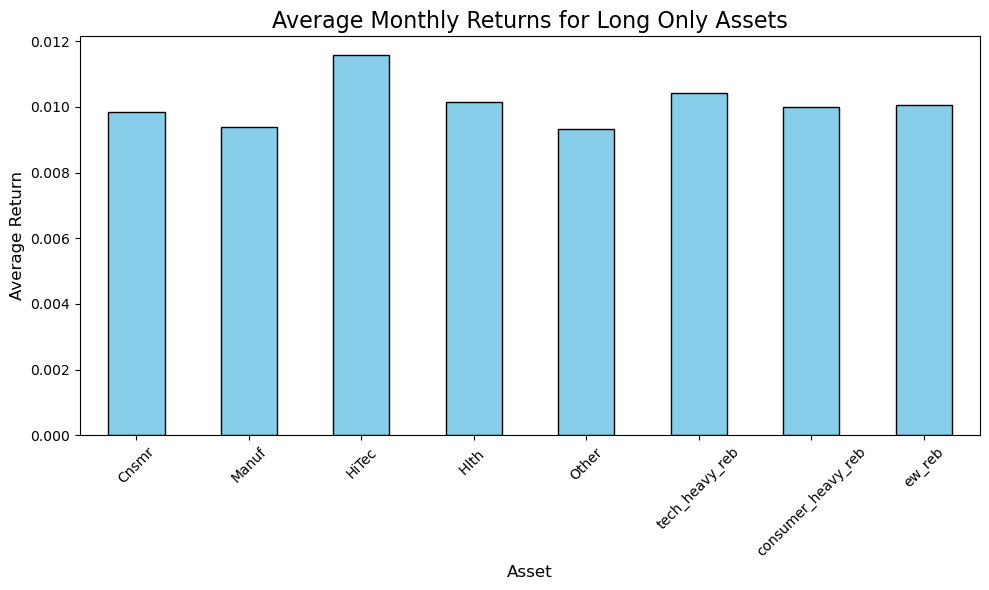

In [571]:
#Get means for pfs
average_returns = assets_monthly.mean()

#Plot figure
plt.figure(figsize=(10, 6))
average_returns.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Monthly Returns for Long Only Assets", fontsize=16)
plt.xlabel("Asset", fontsize=12)
plt.ylabel("Average Return", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Technical trading (15 points)

###  Simple moving average strategy with inflation (CPI) for each asset

In [572]:
# Download CPI data
cpi_data = pdr.DataReader('CPIAUCNS', 'fred', start_date, end_date)
# Rename the column to CPI 
cpi_data.rename(columns={'CPIAUCNS': 'CPI'}, inplace=True)

#Standardize dates
cpi_data.index = cpi_data.index.to_period('M')

#Add previous rolling 3 month avg and long/short positions and avoid look ahead bias
cpi_data['MA3_CPI'] = cpi_data['CPI'].rolling(window=3).mean().shift(2)
cpi_data['Position'] = np.where(cpi_data['CPI'] > cpi_data['MA3_CPI'], 1, np.where(cpi_data['CPI'] <= cpi_data['MA3_CPI'], -1, 0))

# Join for temporary df to calculate returns
assets_with_cpi = assets_monthly.join(cpi_data[['Position']])

# Now multiply the returns by the positions
MAs_CPI_rets = assets_with_cpi.iloc[:, :-1].multiply(assets_with_cpi['Position'], axis=0)

print(MAs_CPI_rets.head())
print(MAs_CPI_rets.tail())
print(MAs_CPI_rets.columns)

          Cnsmr   Manuf   HiTec   Hlth    Other  tech_heavy_reb  \
Date                                                              
1995-01  0.0000  0.0000  0.0000  0.0000  0.0000        0.000000   
1995-02  0.0000  0.0000  0.0000  0.0000  0.0000        0.000000   
1995-03  0.0000  0.0000  0.0000  0.0000  0.0000        0.000000   
1995-04  0.0000  0.0000  0.0000  0.0000  0.0000        0.000000   
1995-05  0.0391  0.0392  0.0222  0.0163  0.0449        0.029805   

         consumer_heavy_reb   ew_reb  
Date                                  
1995-01             0.00000  0.00000  
1995-02             0.00000  0.00000  
1995-03             0.00000  0.00000  
1995-04             0.00000  0.00000  
1995-05             0.03403  0.03234  
          Cnsmr   Manuf   HiTec   Hlth    Other  tech_heavy_reb  \
Date                                                              
2024-06  0.0261 -0.0237  0.0715  0.0293 -0.0013        0.033160   
2024-07  0.0266  0.0366 -0.0148  0.0085  0.0622        0

In [573]:
# Evaluation cell (for grading)
print(MAs_CPI_rets.head(3))
print(MAs_CPI_rets.describe())

         Cnsmr  Manuf  HiTec  Hlth   Other  tech_heavy_reb  \
Date                                                         
1995-01    0.0    0.0    0.0    0.0    0.0             0.0   
1995-02    0.0    0.0    0.0    0.0    0.0             0.0   
1995-03    0.0    0.0    0.0    0.0    0.0             0.0   

         consumer_heavy_reb  ew_reb  
Date                                 
1995-01                 0.0     0.0  
1995-02                 0.0     0.0  
1995-03                 0.0     0.0  
            Cnsmr       Manuf       HiTec       Hlth        Other  \
count  358.000000  358.000000  358.000000  358.000000  358.000000   
mean     0.007503    0.007568    0.010167    0.007227    0.009281   
std      0.042465    0.045584    0.062414    0.043006    0.052953   
min     -0.158500   -0.192400   -0.227200   -0.134800   -0.214600   
25%     -0.017800   -0.017950   -0.021900   -0.020050   -0.023775   
50%      0.009850    0.008400    0.015150    0.007100    0.010600   
75%      0.03180

#### Some basic visualization 

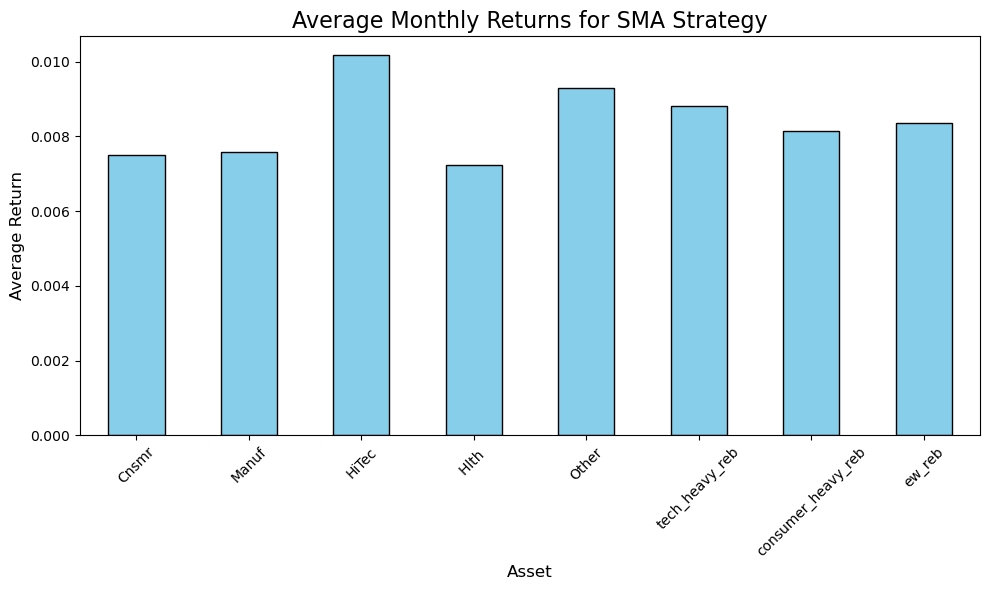

In [574]:
average_returns = MAs_CPI_rets.mean()

#Plot figure
plt.figure(figsize=(10, 6))
average_returns.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Monthly Returns for SMA Strategy", fontsize=16)
plt.xlabel("Asset", fontsize=12)
plt.ylabel("Average Return", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As mentioned in class, often technical trading (at least using this CPI strategy) does not beat market returns as soon through these returns being slightly lower than regular returns from the previous graph.

## 3. Portfolio evaluation (8 points)

In [575]:
#Get market premium rate from fama french
three_factors_day = pdr.get_data_famafrench('F-F_Research_Data_Factors_daily', start=start_date, end=end_date)[0][['Mkt-RF']].div(100)

In [576]:
#Convert dates on market RF to get RF
ff_monthly = (1 + three_factors_day).resample('M').prod() - 1
ff_monthly.index = ff_monthly.index.to_period('M')
rf_rate = ff_monthly['Mkt-RF']

returns = assets_monthly.copy()
rf_rate = rf_rate.reindex(returns.index)
# Calculate excess returns
excess_returns = returns.sub(rf_rate, axis=0)  
# Detailed calculation
mean_excess = excess_returns.mean()
std_excess = excess_returns.std(ddof=1)
sharpe = mean_excess / std_excess * np.sqrt(12)
# Create a DataFrame for Sharpe ratios
sharpe_by_asset = pd.DataFrame({
    'Sharpe_Ratio': sharpe
})

#Calculate MDD using homework method
cumulative_returns = (1 + MAs_CPI_rets).cumprod()
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / running_max
MDD_by_asset = drawdown.min()  

In [577]:
# Evaluation cell (for grading)
sharpe_by_asset

,Sharpe_Ratio
Cnsmr,0.353332
Manuf,0.230238
HiTec,0.459225
Hlth,0.249913
Other,0.233803
tech_heavy_reb,1.562583
consumer_heavy_reb,0.822684
ew_reb,1.045168


In [578]:
# Evaluation cell (for grading)
print(MDD_by_asset)

Cnsmr                -0.327583
Manuf                -0.424375
HiTec                -0.777570
Hlth                 -0.308597
Other                -0.404050
tech_heavy_reb       -0.506393
consumer_heavy_reb   -0.344540
ew_reb               -0.384977
dtype: float64


Taking a look at the results, we can see that the portfolios with the highest sharpe ratios were tech_heavy_reb and ew_reb which are at 1.56 and 1.04 respectively. As Sharpe ratios measure the risk adjusted return of a portfolio, these two numbers make sense. The tech heavy portfolio with regular rebalancing outperformed other asset classes as it was able to take advantage of high performing high beta tech stocks while reducing risk through rebalancing and diversification. Tech has performed well over the last two decades, but also has held higher risk which is why the rebalncing portfolio is the ultimate winner. By pursuing a portfolio with a tech concentration and regular rebalancing and some diversification, investors can acheive good risk adjusted returns.
https://www.investing.com/news/stock-market-news/breaking-down-the-stunning-tech-outperformance-in-last-20-years-3607022
https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/Betas.html
The highest drawdown was in HiTech, which also makes sense. Since it has the highest Beta of all sectors it should have the highest volatility. On the other side of the equation, the smallest drawdown was the healthcare sector. This also makes some sense as healthcare demand is extremely inelastic which would cause it to be less cyclical than other sectors. This would results in a steadier stock performance across various market conditions. By investing in healthcare stocks, investors will be able to see consistent and market condition independent revenue streams. This would result in a lower risk investment with smaller drawdowns.
https://www.alliancebernstein.com/corporate/en/insights/investment-insights/are-healthcare-stocks-still-defensive-in-the-current-environment.html


In [579]:
end_time = time.time()  # End time
execution_time = end_time - start_time
# Calculate the number of full minutes
minutes = int(execution_time // 60)
# Calculate the remaining seconds
seconds = int(execution_time % 60)  
print(f"Execution time for Part I of the project:{minutes} minutes and {seconds} seconds")

Execution time for Part I of the project:0 minutes and 3 seconds
